## General info

Aids: python help file "python_help.ipynb"


Comment your code in your files (.ipynb or .py) to explain your solutions/answers. Save these codes/files under c:\__exam__\Assignments\

On the top of each file write your anonymous code e.g. #ims135-123456



In [33]:
#useful packages
import numpy as np
from numpy import linalg as LA
import math as mt
import os
from matplotlib.image import imread
import matplotlib.pyplot as plt
from matplotlib import rcParams # for changing default values
import scipy.io as sio
import scipy.optimize
from scipy.optimize import minimize
import timeit
import torch
from torch.autograd import grad
import torch.nn as nn
import torch.optim as optim
import random
from scipy.integrate import odeint

## 1. (4p)

Formulate how a matrix $X$ can be decomposed (using  the Singular Value Decomposition (SVD)) into SVD matrices. Discuss the characteristics of the resulting SVD matrices. Additionally, describe how the full SVD can be reduced to the economy version and explain the advantages of employing the economy SVD.


Answer 

$X$ with size $n\times m$ can be described as the product between three matrices:
$$
X=U \, \Sigma \, V^T
$$

The characteristics of these are:
*  $U$ with size $n\times n$   Left singular vectors matrix. Columns are orthogonal unit vectors (representing the space for columns in $X$, usually spatial pattern).
* $\Sigma$ with size $n\times m$  Diagonal matrix containing singular values. 
* $V^T$  with size $m\times m$  Right singular vectors matrix. Columns are orthogonal unit vectors (representing the space for rows in $X$, usually time pattern).

By using that $\Sigma$ has rows with zeros, it is possible (without any information lost) to introduce the economy versions
$$
X=\hat{U} \, \hat{\Sigma} \, V^T
$$
where
* $\hat{U}$ has size $n \times m $
* $\hat{\Sigma}$ has size $m \times m $
Advantages of Economy SVD:

The economy SVD has the advantages:
Computational Efficiency: Economy SVD requires fewer computations, making it more efficient for large datasets.
Memory Efficiency: The reduced size of economy SVD matrices leads to lower memory requirements.

## 2 (4p)
Use Principal Component Analysis (PCA) on data stored in a matrix $X$. The rows of $X$ represent measurement data of temperatures along a coordinate $x$. Each row is data from a measurement (=snapshot). By projecting the data on the two first principal component directions, distinguish which of the snapshots that are outliers. 

The data is found in the problem2_251024.mat file. It contains 50 samples with 200 temperatures in each sample. 


In [34]:
#Load data from .mat file, example
mat_file=sio.loadmat('problem2_251030.mat')
X=mat_file['X'] # Experimental data


In [35]:

#compute mean of all snapshots (columns)
n=np.size(X,0) #number of rows = number of snapshots
m=np.size(X,1) #number of columns = number of measurement points
Xavg =np.zeros(m) #for computation of mean at each measurement point
for i in range(n):
    Xavg=Xavg+X[i,:]
Xavg=Xavg/n
Xbar=np.ones(n).reshape(-1,1) @ Xavg.reshape(1,-1)

#mean centered data
B=X-Xbar
C=1/(n-1)*B.T@B #covariance matrix mxm
V, S, VT=np.linalg.svd(C,full_matrices=True) #for symmetric matrices the SVd analysis and eigenvalue analysis are equivalent (a bit more num expensive)
print(S)

print('size V',V.shape)
print('size B',B.shape)

T=np.zeros((n,m))
for i in range(n):
    for j in range(m):
        T[i,j]=B[i,:]@V[j,:]

print(T.shape)


[2.69297941e+02 4.41026827e-01 1.30714215e-13 1.07566450e-13
 1.04177141e-13 9.87155344e-14 9.50540583e-14 8.28677559e-14
 7.52776277e-14 6.91621287e-14 6.13392067e-14 4.86226474e-14
 4.56707670e-14 3.70585460e-14 2.81757892e-14 2.69080342e-14
 2.69080342e-14 2.69080342e-14 2.69080342e-14 2.69080342e-14
 2.69080342e-14 2.69080342e-14 2.69080342e-14 2.69080342e-14
 2.69080342e-14 2.69080342e-14 2.69080342e-14 2.69080342e-14
 2.69080342e-14 2.69080342e-14 2.69080342e-14 2.69080342e-14
 2.69080342e-14 2.69080342e-14 2.69080342e-14 2.69080342e-14
 2.69080342e-14 2.69080342e-14 2.69080342e-14 2.69080342e-14
 2.69080342e-14 2.69080342e-14 2.69080342e-14 2.69080342e-14
 2.69080342e-14 2.69080342e-14 2.69080342e-14 2.69080342e-14
 2.69080342e-14 2.69080342e-14 2.69080342e-14 2.69080342e-14
 2.69080342e-14 2.69080342e-14 2.69080342e-14 2.69080342e-14
 2.69080342e-14 2.69080342e-14 2.69080342e-14 2.69080342e-14
 2.69080342e-14 2.69080342e-14 2.69080342e-14 2.69080342e-14
 2.69080342e-14 2.690803

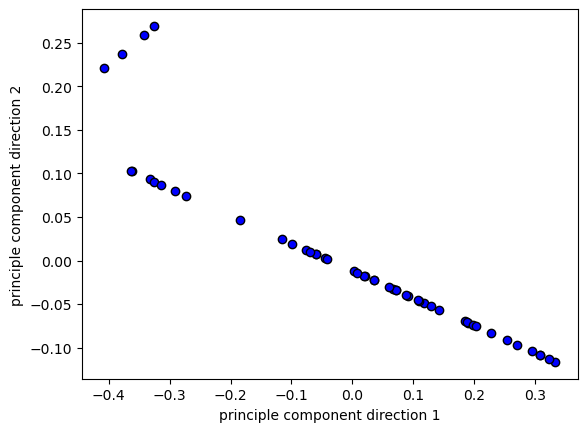

In [36]:
plt.scatter(T[:,0], T[:,1], marker='o', facecolors='blue', edgecolors='black')
plt.xlabel(r'principle component direction 1')    
plt.ylabel('principle component direction 2')
plt.show()


In [37]:
#based on this graph the outliers are obtained from:
ii=[]
for i in range(n):
    if T[i,1]>0.15:
        ii.append(i)
print('one outliers are', ii)
    

one outliers are [10, 11, 34, 46]


## 3 (4p)
For the NN in the figure:

<img src="nn_251030.png" alt="Neural Network" width="900" style="background:#fff; padding:6px;"/>



a) Assume the following numerical values of weights and biases:

$w^{(1)}$:

In [38]:
w1=np.array([[0.15,0.2,-0.4],[0.1,0.45,0.3],[0.17,-0.27,0.]])

$b^{(1)}$:


In [39]:
b1=np.array([0.12,0.05,-0.2])

$w^{(2)}:$


In [40]:
w2=np.array([[0.15,0.2,-0.4],[0.1,0.45,0.3]])

$b^{(2)}$:

In [41]:
b2=np.array([0.33,0.23])


Assume that the activation functions are all tanh. Compute the outputs for $x=[0.2,-0.4,0.65]$



b) The determine the gradients of $\hat{y}_1$ and  $\hat{y}_2$ w.r.t. the parameters of the NN for for $x=[0.2,-0.4,0.65]$. 

In [42]:
#a) solution


x=np.array([0.2,-0.4,0.65])
z1=w1@x+b1
a1=np.tanh(z1)
z2=w2@a1+b2
yhat=np.tanh(z2)
print('yhat= ',yhat)

yhat=  [0.32923612 0.22792817]


In [43]:
#solution b)
#transfor to torch tensors
w1=torch.tensor(w1,dtype=torch.float32,requires_grad=True) 
b1=torch.tensor(b1,dtype=torch.float32,requires_grad=True) 
w2=torch.tensor(w2,dtype=torch.float32,requires_grad=True) 
b2=torch.tensor(b2,dtype=torch.float32,requires_grad=True) 
x=torch.tensor(x, dtype=torch.float32,requires_grad=False)

def get_yhat():
    z1=w1@x+b1
    a1=torch.tanh(z1)
    z2=w2@a1+b2
    yhat=torch.tanh(z2)
    return yhat
yhat=get_yhat()
print('pytorch output',yhat)
yhat[0].backward()
# Access the gradients of y1
dyhat_dw1 = w1.grad
print("Gradient dyhat1_dw1:", dyhat_dw1)
dyhat_db1 = b1.grad
print("Gradient dyhat1_db1:", dyhat_db1)
dyhat_dw2 = w2.grad
print("Gradient dyhat1_dw2:", dyhat_dw2)
dyhat_db2 = b2.grad
print("Gradient dyhat1_db2:", dyhat_db2)


yhat=get_yhat()
w1.grad = w2.grad = b1.grad = b2.grad = None #reset gradients
yhat[1].backward()
# Access the gradients of y1
dyhat_dw1 = w1.grad
print("Gradient dyhat2_dw1:", dyhat_dw1)
dyhat_db1 = b1.grad
print("Gradient dyhat2_db1:", dyhat_db1)
dyhat_dw2 = w2.grad
print("Gradient dyhat2_dw2:", dyhat_dw2)
dyhat_db2 = b2.grad
print("Gradient dyhat2_db2:", dyhat_db2)

pytorch output tensor([0.3292, 0.2279], grad_fn=<TanhBackward0>)
Gradient dyhat1_dw1: tensor([[ 0.0258, -0.0516,  0.0839],
        [ 0.0354, -0.0708,  0.1151],
        [-0.0711,  0.1422, -0.2310]])
Gradient dyhat1_db1: tensor([ 0.1290,  0.1770, -0.3554])
Gradient dyhat1_dw2: tensor([[-0.1674,  0.0756, -0.0517],
        [-0.0000,  0.0000, -0.0000]])
Gradient dyhat1_db2: tensor([0.8916, 0.0000])
Gradient dyhat2_dw1: tensor([[ 0.0183, -0.0366,  0.0595],
        [ 0.0847, -0.1694,  0.2753],
        [ 0.0567, -0.1134,  0.1842]])
Gradient dyhat2_db1: tensor([0.0915, 0.4236, 0.2835])
Gradient dyhat2_dw2: tensor([[-0.0000,  0.0000, -0.0000],
        [-0.1780,  0.0804, -0.0549]])
Gradient dyhat2_db2: tensor([0.0000, 0.9480])


## 4 (5p)

Data from the logarithm of  flow rate–pressure drop vs logarithm of flow rate is given in the $X$ which can be downloaded from the file problem4_251030.mat. The first column in X is the logarithm of flow rate whereas the second column is the flow rate–pressure drop.


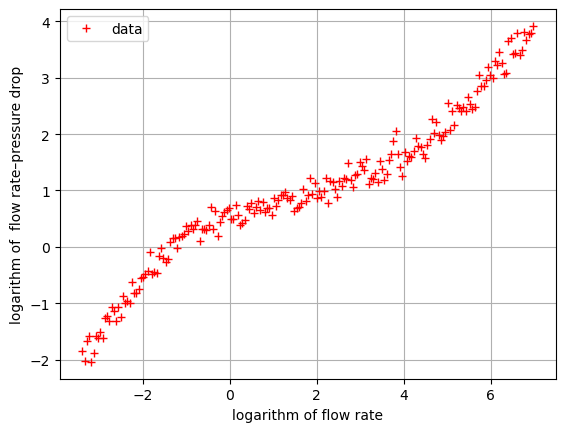

In [44]:
mat_file=sio.loadmat('problem4_251030.mat')
X=mat_file['X']
plt.plot(X[:,0],X[:,1],'r+',label='data')
plt.ylabel('logarithm of  flow rate–pressure drop')
plt.xlabel('logarithm of flow rate')
plt.grid(visible=True)
plt.legend()
plt.show()


a) Use the full data to train a neural network. Assume a feed-forward neural network with one input, three hidden layers with 4 neurons in each layer and one output. Assume the tanh activation function in the hidden layers (but no activation function in the output layer). Choose the Adam optimizer with maximum number of epochs 5000 and the LASSO regularization with the parameter 0.01. 

b) Apply the k-fold cross-validation technique. Use the function train_test_and_k_splits in the help file. Leave 10% of the data for test and 10% of the remaining data for validation. Choose 4 random validation splits. Compute the L2 error against the test data for the split that has lowest L2 error against validation data. (Otherwise assume the same algorithm and parameters as in a).

In [45]:
#x: input data
#y: training data
#lambda_l1: LASSO regularization parameter
#optim_alg: choice of optimization algorithm 'LBFGS', 'Adam','SGD'
def my_nn(x,y,lambda_l1,optim_alg,max_no_epoch):
    # Convert the data to PyTorch tensors
    x_tensor = torch.from_numpy(x).float().unsqueeze(1)
    y_tensor = torch.from_numpy(y).float().unsqueeze(1)

    # Define the neural network model
    class SinNet(nn.Module):
        def __init__(self):
            super(SinNet, self).__init__()
            self.fc1 = nn.Linear(1, 4) #to z1  
            self.fc2 = nn.Linear(4, 4) #to z2
            self.fc3 = nn.Linear(4, 4) #to z3
            self.fc4 = nn.Linear(4,1)  #to yhat
            self.tanh = nn.Tanh()

        def forward(self, x):
            x = self.tanh(self.fc1(x)) #to a1
            x = self.tanh(self.fc2(x)) #to a2
            x = self.tanh(self.fc3(x)) #to a3
            x = self.fc4(x) #to yhat
            return x

    # Set a random seed for reproducibility, the same initial guess
    torch.manual_seed(0)
    
    # Create an instance of the SinNet model
    model = SinNet()  

    # Define the loss function
    criterion = nn.MSELoss()

    # Create a function for LBFGS closure

    def closure():
        optimizer.zero_grad()
        outputs = model(x_tensor)
        loss = criterion(outputs, y_tensor)
    # Calculate the L1 regularization term
        l1_regularization = torch.tensor(0.)
        for param in model.parameters():
            l1_regularization += torch.norm(param, p=1)
    
        # Add the L1 regularization term to the loss
        loss += lambda_l1 * l1_regularization
        loss.backward()
        return loss
    def closure_wrapper():
            loss = closure()
            return loss
    
    
    prev_loss = float('inf')  # Initialize with a large value
    tolerance = 1.e-7

    if optim_alg=='LBFGS':
        optimizer = optim.LBFGS(model.parameters(), lr=0.01, max_iter=1000,tolerance_change=tolerance)
    #alternatively:
    elif optim_alg=='Adam': 
        optimizer = optim.Adam(model.parameters(), lr=0.01)
    elif optim_alg=='SGD': 
        optimizer=torch.optim.SGD(model.parameters(), lr=0.1)

    


    # Training loop
    for epoch in range(max_no_epoch):
        
        optimizer.step(closure_wrapper)

    # Print the loss every 100th epoch
        if (epoch + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}], Loss: {closure().item():.4f}")

        loss = closure()
    
        loss_change = prev_loss - loss.item()
        prev_loss = loss.item()
    
        # Check if the optimizer has converged (you can modify this condition)
    
        if optim_alg=='LBFGS':
            if loss_change < tolerance:
                print(f"Optimizer has converged. Stopping training.")
                break

    # Plot the original data and the fitted curve
    #plt.scatter(x, y, label='Training Data')
    #plt.plot(x, model(x_tensor).detach().numpy(), 'r', label='Fitted Curve')
    #plt.xlabel('x')
    #plt.ylabel('y')
    #plt.legend()
    #plt.show()
    
    return model

Epoch [100], Loss: 0.3075
Epoch [200], Loss: 0.2185
Epoch [300], Loss: 0.2016
Epoch [400], Loss: 0.1920
Epoch [500], Loss: 0.1843
Epoch [600], Loss: 0.1746
Epoch [700], Loss: 0.1677
Epoch [800], Loss: 0.1630
Epoch [900], Loss: 0.1605
Epoch [1000], Loss: 0.1582
Epoch [1100], Loss: 0.1558
Epoch [1200], Loss: 0.1539
Epoch [1300], Loss: 0.1518
Epoch [1400], Loss: 0.1516
Epoch [1500], Loss: 0.1517
Epoch [1600], Loss: 0.1515
Epoch [1700], Loss: 0.1514
Epoch [1800], Loss: 0.1514
Epoch [1900], Loss: 0.1514
Epoch [2000], Loss: 0.1514
Epoch [2100], Loss: 0.1514
Epoch [2200], Loss: 0.1514
Epoch [2300], Loss: 0.1514
Epoch [2400], Loss: 0.1514
Epoch [2500], Loss: 0.1514
Epoch [2600], Loss: 0.1514
Epoch [2700], Loss: 0.1514
Epoch [2800], Loss: 0.1513
Epoch [2900], Loss: 0.1515
Epoch [3000], Loss: 0.1514
Epoch [3100], Loss: 0.1513
Epoch [3200], Loss: 0.1515
Epoch [3300], Loss: 0.1514
Epoch [3400], Loss: 0.1514
Epoch [3500], Loss: 0.1514
Epoch [3600], Loss: 0.1513
Epoch [3700], Loss: 0.1514
Epoch [380

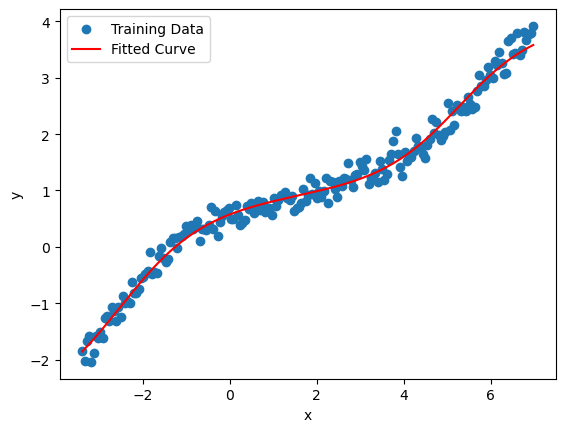

In [46]:
#a) solution
x=X[:,0]
y=X[:,1]


optim_alg='Adam'  #'LBFGS'
# Define the L1 regularization strength (lambda)
lambda_l1 = 0.01  # You can adjust this value
max_no_epoch=5000
mymodel=my_nn(x,y,lambda_l1,optim_alg,max_no_epoch)
mymodel.eval()
xx = torch.from_numpy(x).float().unsqueeze(1)   # shape (n, 1)

with torch.no_grad():
    outputs = mymodel(xx)
    error=np.linalg.norm(outputs.numpy()-y,2)
    print(error, 'error in a)')
    plt.scatter(x, y, label='Training Data')
    plt.plot(x, outputs.numpy(), 'r', label='Fitted Curve')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [47]:
def train_test_and_k_splits(
    indices,
    test_frac=0.10,          # fraction of data to hold out for the *final test set*
    k=5,                     # number of random validation splits to create
    val_count=None,          # size of each validation set (number of points)
    val_frac=None,           # or fraction of remaining data to use for validation
    seed=42
):
    """
    Split a dataset into:
      1) one fixed test set (held out once and for all)
      2) k random (train, validation) splits from the remaining data

    Parameters
    ----------
    indices : array of int
        All sample indices (e.g., np.arange(n_samples)).
    test_frac : float
        Fraction of total data to hold out as the test set.
    k : int
        Number of random splits to generate from the remaining data.
    val_count : int, optional
        Exact number of validation samples in each split.
    val_frac : float, optional
        Fraction of the *remaining* data to use for validation in each split.
        Used if val_count is not given.
    seed : int
        Random seed for reproducibility.

    Returns
    -------
    test_idx : array of int
        Indices belonging to the test set.
    splits : list of (train_idx, val_idx)
        Each element is a tuple with training indices and validation indices.
    """
    rng = np.random.default_rng(seed)
    n = len(indices)

    # --- Step 1: Create a fixed test set (will never be touched again) ---
    n_test = max(1, int(round(n * test_frac)))  # how many samples in the test set
    test_idx = rng.choice(n, size=n_test, replace=False)  # randomly choose test indices
    test_idx.sort()  # sort for readability

    # Remaining data after removing test set
    mask = np.ones(n, dtype=bool)
    mask[test_idx] = False
    remaining = indices[mask]
    n_rem = len(remaining)

    # --- Step 2: Decide how large each validation set should be ---
    if val_count is None:
        if val_frac is None:
            # if user didn’t specify, default to 20% of remaining data
            val_frac = 0.2
        val_count = max(1, int(round(n_rem * val_frac)))

    if val_count >= n_rem:
        raise ValueError("Validation set must be smaller than remaining data.")

    # --- Step 3: Generate k random splits (train/val) from remaining data ---
    splits = []
    for _ in range(k):
        # randomly choose indices for the validation set (within remaining pool)
        val_local_idx = rng.choice(n_rem, size=val_count, replace=False)
        val_local_idx.sort()

        # build the validation indices
        val_idx = remaining[val_local_idx]

        # everything else in 'remaining' goes to the training set
        rem_mask = np.ones(n_rem, dtype=bool)
        rem_mask[val_local_idx] = False
        train_idx = remaining[rem_mask]

        splits.append((train_idx, val_idx))

    return test_idx, splits


Split 1
Train indices: [  0   1   2   4   7   8   9  10  11  13  14  15  16  18  20  21  23  24
  25  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43
  44  45  46  49  51  53  55  57  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  82  83  84  85  87  88  89  90
  91  92  95  97  98  99 100 101 102 103 104 105 106 107 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 128 129 130 131 132
 133 134 135 136 137 140 141 143 145 147 148 149 150 151 152 153 155 156
 157 158 159 160 162 163 164 165 167 168 169 170 171 172 173 174 176 177
 178 180 181 182 183 184 186 189 190 191 192 193 194 195 196 197 198 199
 200]
Validation indices: [  3  12  19  22  48  54  56  58  94  96 108 139 142 144 146 185 187 188]
Test indices (fixed): [  5   6  17  26  47  50  52  59  80  81  86  93 109 127 138 154 161 166
 175 179]
Epoch [100], Loss: 0.3129
Epoch [200], Loss: 0.2165
Epoch [300], Loss: 0.1993
Epoch [400], Loss: 0.1903
Epoch [500

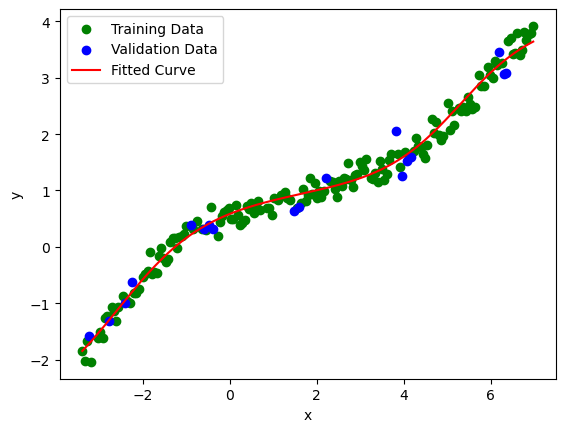

26.860730433671165 test error

Split 2
Train indices: [  0   1   2   3   4   7   8   9  10  11  13  14  15  16  18  19  20  21
  22  23  24  25  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  42  43  44  45  46  48  49  51  54  55  56  57  58  60  61  62  63  64
  65  66  67  68  70  71  72  73  74  75  76  77  78  79  82  83  84  85
  89  90  91  92  94  95  96  97  98 100 101 102 103 105 106 107 108 110
 111 112 113 114 115 118 119 120 121 123 124 125 126 128 129 130 132 133
 134 135 136 137 139 140 141 142 143 144 145 146 148 149 150 151 152 153
 155 156 158 159 162 163 165 167 169 170 171 172 173 174 176 177 178 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 198 199
 200]
Validation indices: [ 12  41  53  69  87  88  99 104 116 117 122 131 147 157 160 164 168 197]
Test indices (fixed): [  5   6  17  26  47  50  52  59  80  81  86  93 109 127 138 154 161 166
 175 179]
Epoch [100], Loss: 0.3116
Epoch [200], Loss: 0.2216
Epoch [300], Loss: 0.2049
Epoch 

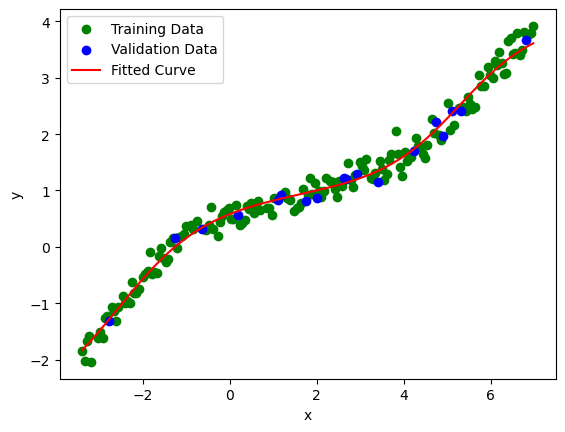

26.831350223191667 test error

Split 3
Train indices: [  0   2   3   4   7   8   9  10  11  12  13  14  16  18  19  20  21  22
  23  24  25  27  28  29  30  31  32  33  34  36  37  38  39  41  42  43
  44  45  46  48  49  53  54  56  57  58  60  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  82  83  84  85  87  88  89
  91  92  95  96  97  98  99 100 101 102 103 104 105 106 107 108 110 111
 112 113 114 115 116 117 118 119 120 122 123 124 126 128 129 131 132 133
 134 135 136 137 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 155 156 157 158 160 162 164 165 167 169 170 171 172 173 174 176 177
 178 180 181 183 184 185 186 187 188 189 191 192 193 194 195 196 197 199
 200]
Validation indices: [  1  15  35  40  51  55  61  90  94 121 125 130 159 163 168 182 190 198]
Test indices (fixed): [  5   6  17  26  47  50  52  59  80  81  86  93 109 127 138 154 161 166
 175 179]
Epoch [100], Loss: 0.3051
Epoch [200], Loss: 0.2162
Epoch [300], Loss: 0.1993
Epoch 

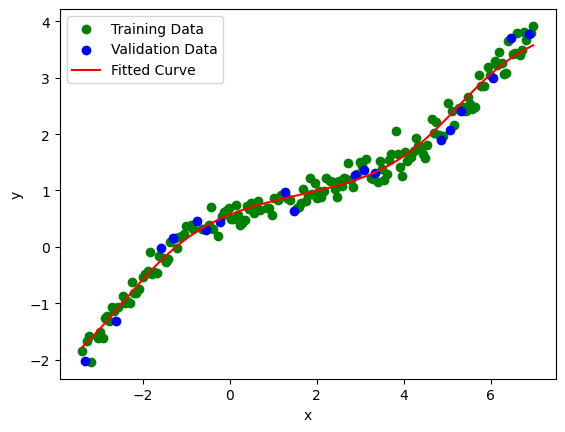


Split 4
Train indices: [  0   1   2   3   7   8   9  10  11  12  13  14  16  18  19  20  21  22
  23  24  25  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  48  49  51  53  54  55  56  57  58  60  61  62  63
  65  66  67  68  69  70  71  72  73  74  75  76  77  79  82  83  84  85
  87  88  90  91  92  95  97  98  99 100 101 102 103 104 105 106 107 110
 111 113 114 115 116 117 118 119 120 121 122 123 124 125 126 128 129 131
 132 134 135 136 137 139 140 141 142 143 144 145 146 148 149 150 151 152
 153 155 156 157 158 159 160 162 165 167 168 170 171 172 173 174 176 178
 181 182 183 184 185 186 188 189 190 191 192 193 194 195 196 197 198 199
 200]
Validation indices: [  4  15  64  78  89  94  96 108 112 130 133 147 163 164 169 177 180 187]
Test indices (fixed): [  5   6  17  26  47  50  52  59  80  81  86  93 109 127 138 154 161 166
 175 179]
Epoch [100], Loss: 0.3078
Epoch [200], Loss: 0.2191
Epoch [300], Loss: 0.2022
Epoch [400], Loss: 0.1926
Epoch [500

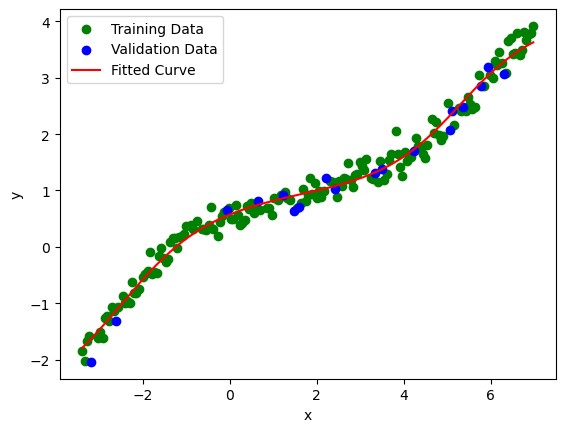

b) 26.831350223191667 test error  best split= 2 min validation error: 19.019618291041994


In [48]:
N = len(X)
all_idx = np.arange(N, dtype=int)
test_idx, splits = train_test_and_k_splits(
    indices=all_idx,
    test_frac=0.10,   # 10% test holdout
    k=4,              # create 4 random validation splits
    val_frac=0.1,     # each split: 10% of remaining data for validation
    seed=1            # random seed for reproducibility
)

min_validation_error=1.e12
for i, (train_idx, val_idx) in enumerate(splits, 1):
    print(f"\nSplit {i}")
    print("Train indices:", train_idx)
    print("Validation indices:", val_idx)
    print("Test indices (fixed):", test_idx)
    x_train, y_train = x[train_idx], y[train_idx]  #x and y values for training
    x_val, y_val = x[val_idx], y[val_idx] #x and y values for validation
    mymodel=my_nn(x_train,y_train,lambda_l1,optim_alg,max_no_epoch)
    
    
    with torch.no_grad():
        mymodel.eval()
        xx = torch.from_numpy(x_val).float().unsqueeze(1)   # shape (n, 1)
        outputs = mymodel(xx)
        validation_error=np.linalg.norm(outputs.numpy()-y_val,2)
        print(validation_error, 'validation error')
        plt.scatter(x_train, y_train,c='g', label='Training Data')
        plt.scatter(x_val, y_val,c='b', label='Validation Data')
        xx = torch.from_numpy(x).float().unsqueeze(1) 
        outputs = mymodel(xx)
        plt.plot(x, outputs.numpy(), 'r', label='Fitted Curve')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()
    if validation_error<min_validation_error:
        min_validation_error=validation_error
        x_test, y_test = x[test_idx], y[test_idx] #x and y values for test
        mymodel.eval()
        xx = torch.from_numpy(x_test).float().unsqueeze(1)   # shape (n, 1)
        with torch.no_grad():
            outputs = mymodel(xx)
            test_error=np.linalg.norm(outputs.numpy()-y_test,2)
            print(test_error, 'test error')
            best_split=i
            
        
print('b)',test_error,'test error',' best split=',best_split,'min validation error:',min_validation_error)

## 5 (3p)
For the data X in problem 2 (problem2_251030.mat) where two classes of results were detected. Train a neural network and see if you can identify the correct class for all (50) the temperature field results.

In [49]:
#Load data from .mat file, example
mat_file=sio.loadmat('problem2_251030.mat')
X=mat_file['X'] # Experimental data
print(X.shape)
print(np.size(X,0))


(50, 200)
50


In [50]:
#solution
y=np.zeros((np.size(X,0),2)) #for encoding the two classes
for i in range(np.size(X,0)):
    y[i,:]=np.array([1.,0.]) #set all to class 0

for i in range(len(ii)): #set the detected outliers from 2. to class 1
    y[ii[i],:]=np.array([0.,1.])
    
x_train_tensor = torch.tensor(X, dtype=torch.float32)
y_train_tensor = torch.tensor(y, dtype=torch.float32)

class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        x = self.fc(x)
        return x
# Initialize the model, loss function, and optimizer
input_size = 200
output_size = 2  # Number of classes
model = SimpleNN(input_size, output_size)
criterion = nn.CrossEntropyLoss()   #here comes cross entropy loss function
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train_tensor)
    probabilities=torch.softmax(outputs, dim=1)   #here comes softmax function 
    loss = criterion(probabilities, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# Model evaluation
model.eval()
with torch.no_grad():
    outputs = model(x_train_tensor)
    probabilities=torch.softmax(outputs, dim=1)
    predicted_classes=torch.argmax(probabilities, dim=1)
    test_classes=torch.argmax(y_train_tensor, dim=1)
accuracy = torch.sum(predicted_classes == test_classes).item() / y_train_tensor.size(0)
print(f"Accuracy: {accuracy * 100:.2f}%")
#print(predicted_classes)
#print(ii)

Epoch [100/1000], Loss: 0.3580
Epoch [200/1000], Loss: 0.3507
Epoch [300/1000], Loss: 0.3444
Epoch [400/1000], Loss: 0.3395
Epoch [500/1000], Loss: 0.3357
Epoch [600/1000], Loss: 0.3328
Epoch [700/1000], Loss: 0.3305
Epoch [800/1000], Loss: 0.3286
Epoch [900/1000], Loss: 0.3271
Epoch [1000/1000], Loss: 0.3258
Accuracy: 100.00%


 ## 6 (3p)

 Describe in words the ideas behind Physics Informed Neural Networks. In particular answer

 - how is the cost function typically decomposed?
 - in what part of the cost function is the physics included?
 - what problem areas can PINNs be used for?
 - what are the pros and cons?

PINNs are neural networks that solve physical problems by embedding the governing equations into their loss function.
The total loss is typically split into a data term (matching observations) and a physics term,
$$ C_{data}+C_{physics}$$

The physics term $C_{physics}$  includes the residuals of the governing PDEs as well as boundary and initial conditions, ensuring the network’s outputs obey physical laws.

PINNs are used for solving PDEs and inverse problems where parameter (e.g. geometrical or material properties) are unknown (or their combination). It is a general method and can be used in any area. Examples from mechanical engineering are heat transfer, fluid flow, and solid mechanics.

Pros are that it is convenient to combine data from measurements and information about physics. Cons are that the physics is not completely fulfilled and the training can be difficult and slow.

## 7 (5p)
Assume a dynamical system can be written as:
$$
\dot{y}=( \dot{x}_1, \, \dot{x}_2, \,\dot{x}_3, \, \ddot{x}_1, \, \ddot{x}_2, \,\ddot{x}_3)^T=
(y_4, \, y_5, \, y_6, \, f(y, \dot{y}), \, g(y, \dot{y}), \, h(y, \dot{y}))^T+
(0, \, 0, \, 0, \, 0, \, F(t)/m_2, \, 0 )^T
$$
where $m_2=1$ kg and $F(t)$ defined by

In [51]:
def F(t):
    return 100.*np.sin( t*2.*np.pi )*np.exp(-t*2.*np.pi)

Use model discovery and SinDy to find the expressions for $f$, $g$ and $h$. Assume assume up to 2nd degree polynomials in your model library ${\boldsymbol \Theta}$. Experimental values for $y$ and $\dot{y}$ are given in the matrices $\dot{Y}$ and $Y$ (both with dimensions 500 times 6 where 500 refers to the number of timesteps). Import these by:


In [52]:
mat_file=sio.loadmat('problem7_251030.mat')
Y=mat_file['Y']
Ydot=mat_file['Ydot']


The time is given by

In [53]:
t = np.linspace(0, 40, 500)

In [54]:
#solution
from itertools import combinations_with_replacement

def polynomial_library(X, degree=3, include_bias=True, return_names=True):
    """
    Build a polynomial feature library (monomials) up to the given degree.
    Works for any number of inputs (columns in X) and any degree >= 0.

    Parameters
    ----------
    X : array, shape (n_samples, n_features)
        Input data (each column is a variable x1..x_n).
    degree : int
        Maximum total degree of monomials to include.
    include_bias : bool
        If True, include the constant column (1).
    return_names : bool
        If True, also return a list of column names for interpretability.

    Returns
    -------
    Phi : array, shape (n_samples, n_terms)
        Polynomial feature matrix [1, x_i, x_i x_j, ..., up to 'degree'].
    names : list of str (optional)
        Names like ['1','x1','x2','x1^2','x1*x2', ...].
    """
    X = np.asarray(X)
    if X.ndim == 1:
        X = X[:, None]  # allow 1D input

    n_samples, n_features = X.shape
    cols = []
    names = []

    # Degree 0 (bias)
    if include_bias:
        cols.append(np.ones((n_samples, 1)))
        if return_names:
            names.append("1")

    # Degrees 1..degree
    for d in range(1, degree + 1):
        for idxs in combinations_with_replacement(range(n_features), d):
            # product of selected columns; idxs is nondecreasing => unique monomial
            col = np.prod(X[:, idxs], axis=1, dtype=float)[:, None]
            cols.append(col)
            if return_names:
                # Build a readable name like x1^2*x3
                # Count powers per variable in this combo
                powers = np.bincount(idxs, minlength=n_features)
                parts = []
                for j, p in enumerate(powers):
                    if p == 0: 
                        continue
                    parts.append(f"x{j+1}" if p == 1 else f"x{j+1}^{p}")
                names.append("*".join(parts))

    Phi = np.hstack(cols) if cols else np.empty((n_samples, 0))

    return (Phi, names) if return_names else Phi

#sequential least square
def sparsifyDynamics(Theta,dXdt,lamb,n):
    Xi = np.linalg.lstsq(Theta,dXdt,rcond=None)[0] # Initial guess: Least-squares
    
    for k in range(100):
        smallinds = np.abs(Xi) < lamb # Find small coefficients, here is the threshold
        Xi[smallinds] = 0                          # and threshold
        for ind in range(n):                       # n is state dimension
            biginds = smallinds[:,ind] == 0
            # Regress dynamics onto remaining terms to find sparse Xi
            Xi[biginds,ind] = np.linalg.lstsq(Theta[:,biginds],dXdt[:,ind],rcond=None)[0]
            
    return Xi


for i in range(len(t)):
    Ydot[i,4]=Ydot[i,4]-F(t[i])/1. #take away the force
    
Theta, theta_library = polynomial_library(Y, degree=2, include_bias=True)
print(theta_library)

lamb = 0.0001 # sparsification limit



Xi = sparsifyDynamics(Theta, Ydot, lamb, np.size(Ydot,1))

#now a trick to get informative output
Xi_object=Xi.astype(object)
theta_library_column = np.array(theta_library).reshape(-1, 1)
print(np.hstack((Xi_object, theta_library_column)))

['1', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x1^2', 'x1*x2', 'x1*x3', 'x1*x4', 'x1*x5', 'x1*x6', 'x2^2', 'x2*x3', 'x2*x4', 'x2*x5', 'x2*x6', 'x3^2', 'x3*x4', 'x3*x5', 'x3*x6', 'x4^2', 'x4*x5', 'x4*x6', 'x5^2', 'x5*x6', 'x6^2']
[[0.0 0.0 0.0 0.0 0.0 0.0 '1']
 [0.0 0.0 0.0 -1.9999999999999998 0.9999999999999988 0.0 'x1']
 [0.0 0.0 0.0 1.0000000000000007 -1.999999999999999 1.0000000000000004
  'x2']
 [0.0 0.0 0.0 0.0 0.9999999999999996 -2.000000000000001 'x3']
 [1.0000000000000002 0.0 0.0 -0.9999999999999939 1.0000000000000004 0.0
  'x4']
 [0.0 1.0 0.0 0.9999999999999951 -1.0 0.0 'x5']
 [0.0 0.0 1.0000000000000002 0.0 0.0 0.0 'x6']
 [0.0 0.0 0.0 0.0 0.0 0.0 'x1^2']
 [0.0 0.0 0.0 0.0 0.0 0.0 'x1*x2']
 [0.0 0.0 0.0 0.0 0.0 0.0 'x1*x3']
 [0.0 0.0 0.0 0.0 0.0 0.0 'x1*x4']
 [0.0 0.0 0.0 0.0 0.0 0.0 'x1*x5']
 [0.0 0.0 0.0 0.0 0.0 0.0 'x1*x6']
 [0.0 0.0 0.0 0.0 0.0 0.0 'x2^2']
 [0.0 0.0 0.0 0.0 0.0 0.0 'x2*x3']
 [0.0 0.0 0.0 0.0 0.0 0.0 'x2*x4']
 [0.0 0.0 0.0 0.0 0.0 0.0 'x2*x5']
 [0.0 0.0 0.0 0.0

In [56]:
print(Xi_object)

[[0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 -1.9999999999999998 0.9999999999999988 0.0]
 [0.0 0.0 0.0 1.0000000000000007 -1.999999999999999 1.0000000000000004]
 [0.0 0.0 0.0 0.0 0.9999999999999996 -2.000000000000001]
 [1.0000000000000002 0.0 0.0 -0.9999999999999939 1.0000000000000004 0.0]
 [0.0 1.0 0.0 0.9999999999999951 -1.0 0.0]
 [0.0 0.0 1.0000000000000002 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0]]


This means that:

$$
\dot{y}_1=y_4
$$
$$
\dot{y}_2=y_5
$$
$$
\dot{y}_3=y_6
$$
$$
\dot{y}_4=-2y_1+y_2-y_4+y_5
$$
$$
\dot{y}_5=y_1-2y_2+y_3+y_4-y_5+F/m_2
$$
$$
\dot{y}_6=y_2-2y_3
$$
